In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load Data
data= pd.read_csv(r'C:/Users/sonke/Documents/Project/Sales/Stores.csv')

# Data Preprocessing 

In [13]:
print(data)

     Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0            1        1659             1961                   530        66490
1            2        1461             1752                   210        39820
2            3        1340             1609                   720        54010
3            4        1451             1748                   620        53730
4            5        1770             2111                   450        46620
..         ...         ...              ...                   ...          ...
891        892        1582             1910                  1080        66390
892        893        1387             1663                   850        82080
893        894        1200             1436                  1060        76440
894        895        1299             1560                   770        96610
895        896        1174             1429                  1110        54340

[896 rows x 5 columns]


In [14]:
print(data.describe())


        Store ID    Store_Area  Items_Available  Daily_Customer_Count  \
count  896.000000   896.000000       896.000000            896.000000   
mean   448.500000  1485.409598      1782.035714            786.350446   
std    258.797218   250.237011       299.872053            265.389281   
min      1.000000   775.000000       932.000000             10.000000   
25%    224.750000  1316.750000      1575.500000            600.000000   
50%    448.500000  1477.000000      1773.500000            780.000000   
75%    672.250000  1653.500000      1982.750000            970.000000   
max    896.000000  2229.000000      2667.000000           1560.000000   

         Store_Sales  
count     896.000000  
mean    59351.305804  
std     17190.741895  
min     14920.000000  
25%     46530.000000  
50%     58605.000000  
75%     71872.500000  
max    116320.000000  


In [15]:
data.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [16]:
#Check the correlation between different variables, especially how Store Area, Items Available, and Daily Customer Count relate to Store Sales

correlation_matrix = data.corr()
print(correlation_matrix)


                      Store ID   Store_Area  Items_Available  \
Store ID               1.000000   -0.058705        -0.055707   
Store_Area            -0.058705    1.000000         0.998891   
Items_Available       -0.055707    0.998891         1.000000   
Daily_Customer_Count  -0.010029   -0.041423        -0.040978   
Store_Sales            0.071486    0.097474         0.098849   

                      Daily_Customer_Count  Store_Sales  
Store ID                         -0.010029     0.071486  
Store_Area                       -0.041423     0.097474  
Items_Available                  -0.040978     0.098849  
Daily_Customer_Count              1.000000     0.008629  
Store_Sales                       0.008629     1.000000  


In [ ]:
#The analysis indicates that Store Area and Items Available are almost perfectly correlated, suggesting larger stores have more items available, but both variables have only weak positive correlations with Store Sales. Daily Customer Count shows minimal correlation with Store Sales and other variables, indicating other factors might better predict sales performance.

C:\Users\sonke\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


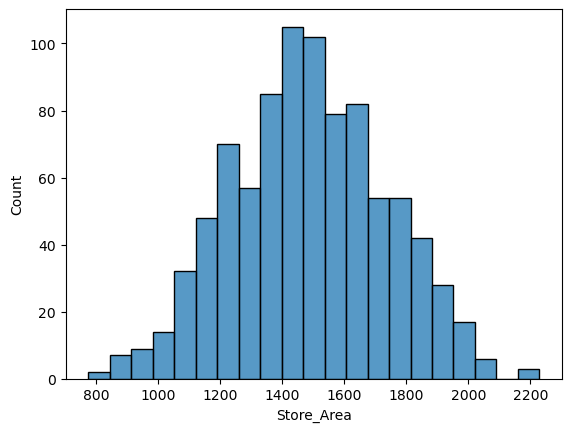

C:\Users\sonke\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


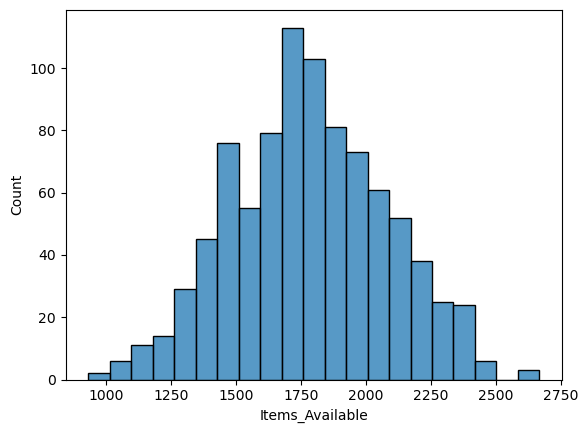

C:\Users\sonke\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


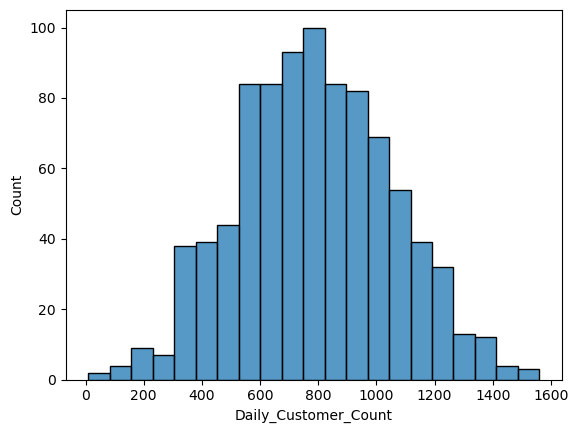

C:\Users\sonke\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


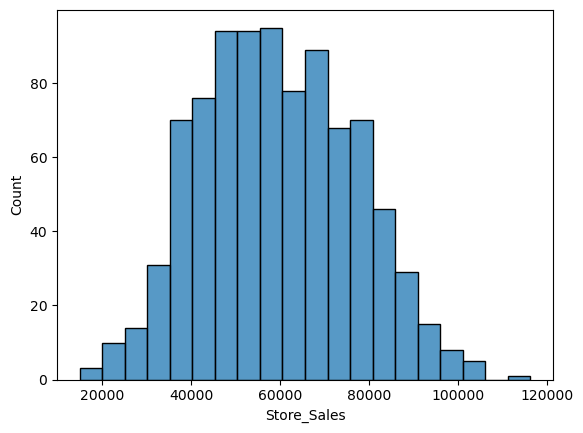

In [22]:
#Distrubution analysis
import seaborn as sns
import matplotlib.pyplot as plt

data.columns = data.columns.str.strip()

# Plotting histograms
sns.histplot(data['Store_Area'])
plt.show()

sns.histplot(data['Items_Available'])
plt.show()

sns.histplot(data['Daily_Customer_Count'])
plt.show()

sns.histplot(data['Store_Sales'])
plt.show()


In [ ]:
#The store area and the items available are uniformly distributed throughout the dataset. The distribution of store sales shows a slight right skew, indicating higher values are more spread out. On the other hand, the daily customer count exhibits a left skew, meaning lower values are more spread out.

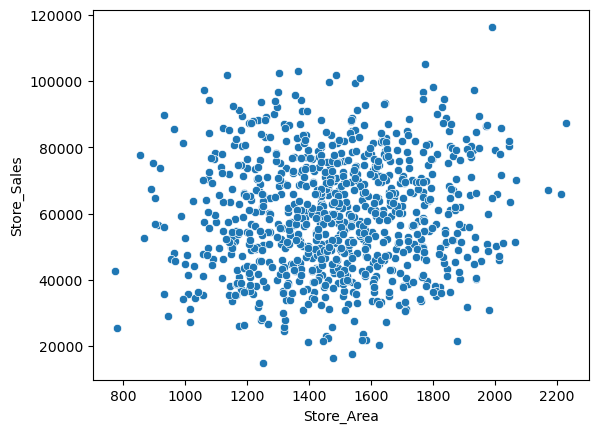

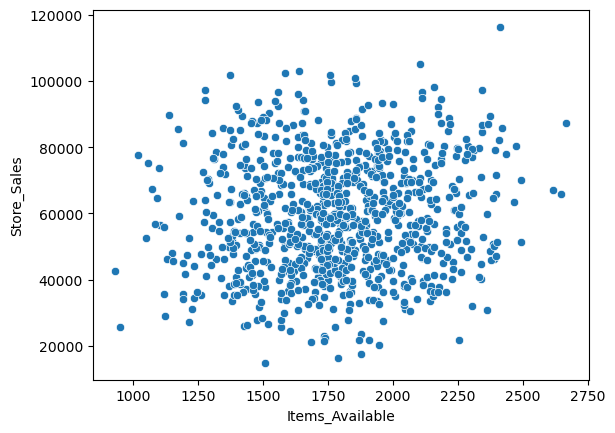

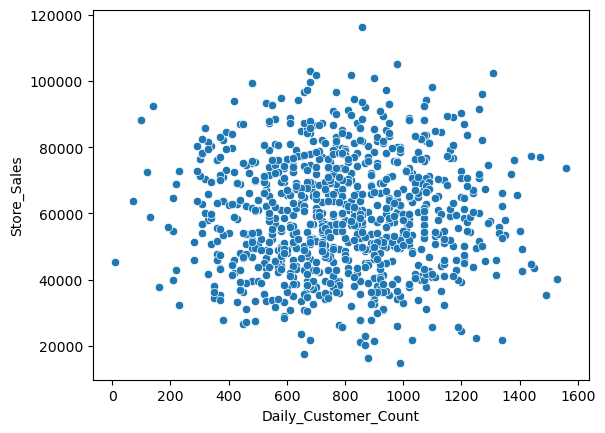

In [24]:
# Relationship Analysis , relationships between Store Sales and other variables
sns.scatterplot(x='Store_Area', y='Store_Sales', data=data)
plt.show()

sns.scatterplot(x='Items_Available', y='Store_Sales', data=data)
plt.show()

sns.scatterplot(x='Daily_Customer_Count', y='Store_Sales', data=data)
plt.show()

In [26]:
#Feature Engineering
#Creating New Features:
data['Sales_per_Customer'] = data['Store_Sales'] / data['Daily_Customer_Count']
